In [29]:
suppressWarnings(library('Ribolog'))
suppressWarnings(library('riboWaltz'))
suppressWarnings(library(ggplot2))

suppressWarnings(library(tidyverse))

In [8]:
annotation <- Ribolog::read_annotation("~/genomes/Ribolog/Human.GRC38.96_annotation.txt")

In [9]:
reads_list <- riboWaltz::bamtolist(bamfolder='./bam_processed/RPF', annotation=annotation)

Reading 1_RiboSeq_S25DMSO_r1.ensemble.cds.longest.srt.dd.bam
Input reads: 2.187 M
0.000 M  (0.013 %) reads removed: exceeding indel_threshold.
0.325 M  (14.857 %) reads removed: reference transcript IDs not found in annotation table.
0.269 M  (14.450 %) reads removed: mapping on negative strand.
Output reads: 1.593 M
Done! 1_RiboSeq_S25DMSO_r1.ensemble.cds.longest.srt.dd.bam has been loaded as 1_RiboSeq_S25DMSO_r1.ensemble.cds.longest.srt.dd 

Reading 1_RiboSeq_S25DMSO_r2.ensemble.cds.longest.srt.dd.bam
Input reads: 1.451 M
0.000 M  (0.014 %) reads removed: exceeding indel_threshold.
0.219 M  (15.092 %) reads removed: reference transcript IDs not found in annotation table.
0.165 M  (13.387 %) reads removed: mapping on negative strand.
Output reads: 1.067 M
Done! 1_RiboSeq_S25DMSO_r2.ensemble.cds.longest.srt.dd.bam has been loaded as 1_RiboSeq_S25DMSO_r2.ensemble.cds.longest.srt.dd 

Reading 1_RiboSeq_S25Drug_r1.ensemble.cds.longest.srt.dd.bam
Input reads: 1.484 M
0.000 M  (0.013 %) rea

In [10]:
psite_offset <- Ribolog::psite_rW(reads_list)

processing 1_RiboSeq_S25DMSO_r1.ensemble.cds.longest.srt.dd
best offset: 12 nts from the 5' end
processing 1_RiboSeq_S25DMSO_r2.ensemble.cds.longest.srt.dd
best offset: 13 nts from the 5' end
processing 1_RiboSeq_S25Drug_r1.ensemble.cds.longest.srt.dd
best offset: 13 nts from the 5' end
processing 1_RiboSeq_S25Drug_r2.ensemble.cds.longest.srt.dd
best offset: 13 nts from the 5' end


In [11]:
reads_psite_list <- Ribolog::psite_info_rW(reads_list, psite_offset)

processing 1_RiboSeq_S25DMSO_r1.ensemble.cds.longest.srt.dd
1. adding p-site position
2. adding transcript region
processing 1_RiboSeq_S25DMSO_r2.ensemble.cds.longest.srt.dd
1. adding p-site position
2. adding transcript region
processing 1_RiboSeq_S25Drug_r1.ensemble.cds.longest.srt.dd
1. adding p-site position
2. adding transcript region
processing 1_RiboSeq_S25Drug_r2.ensemble.cds.longest.srt.dd
1. adding p-site position
2. adding transcript region


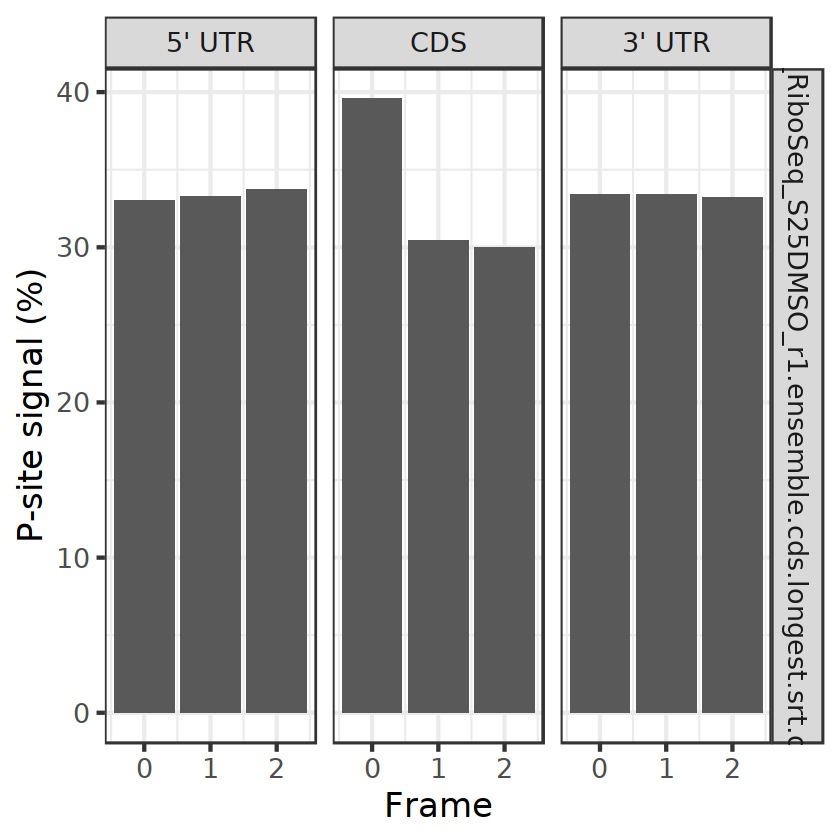

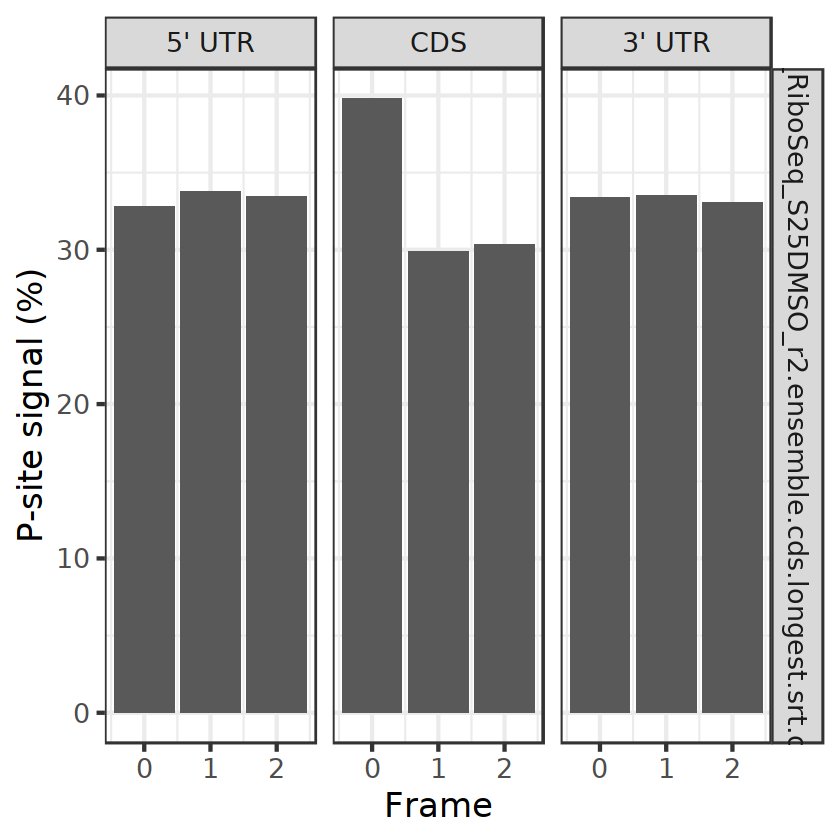

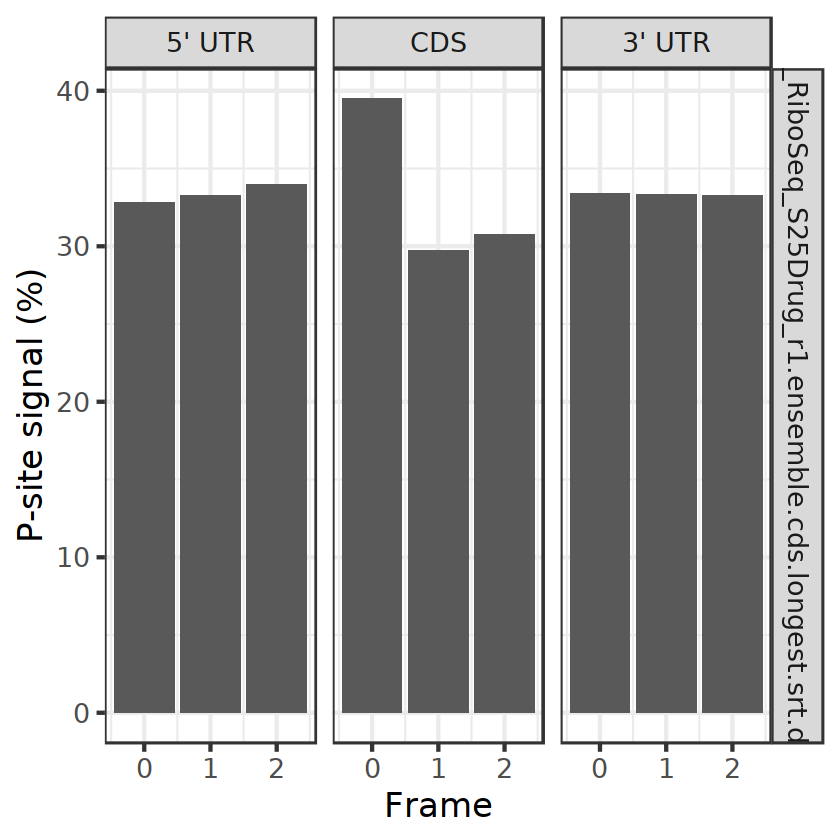

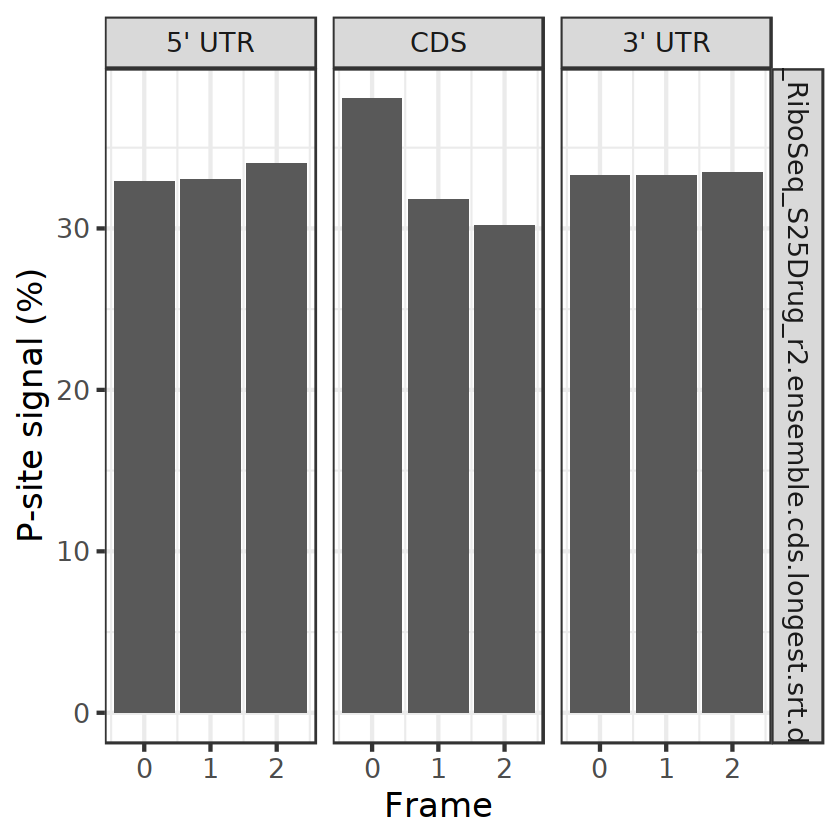

In [14]:
Ribolog::print_period_region(reads_psite_list)

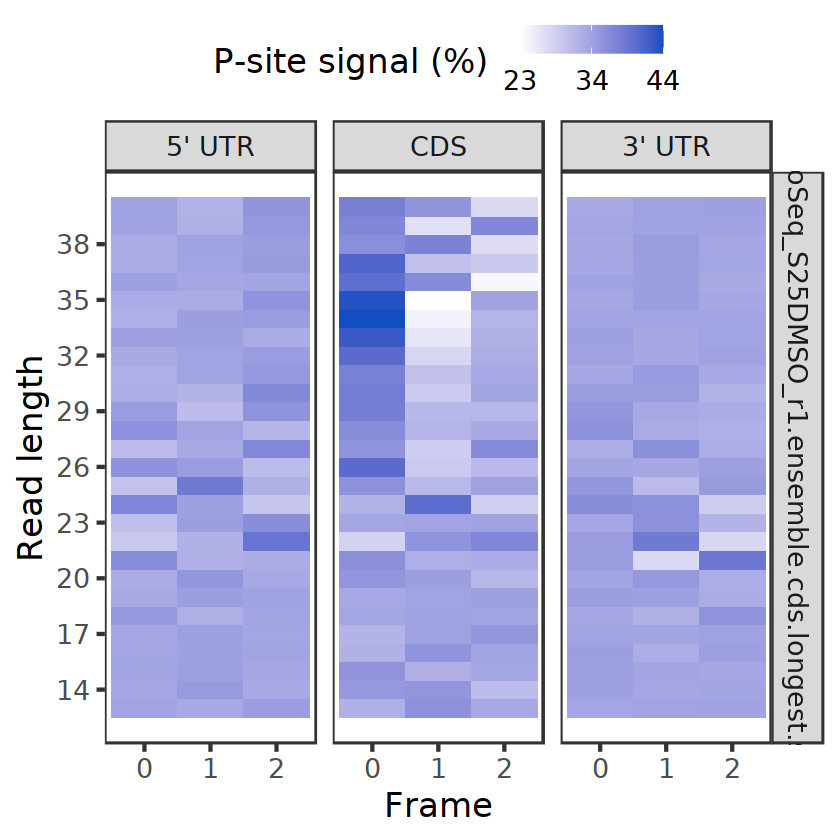

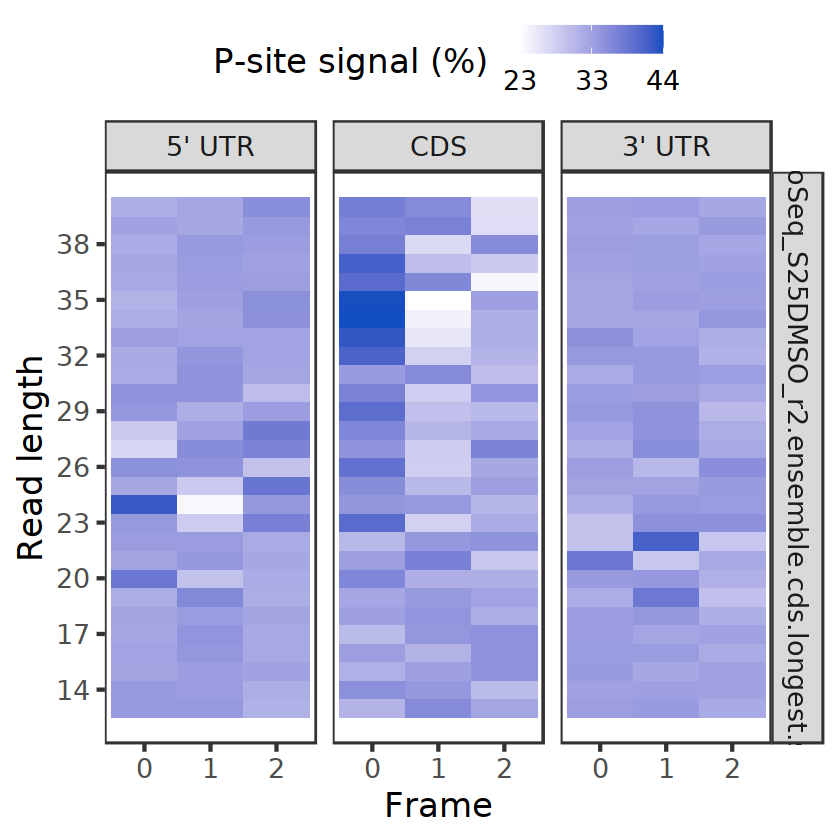

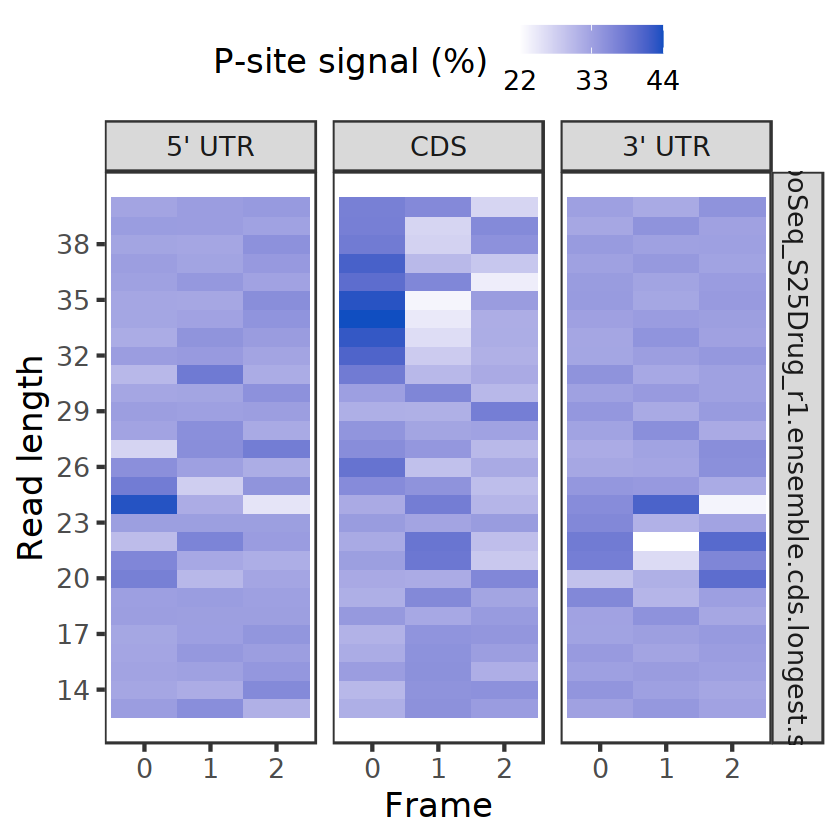

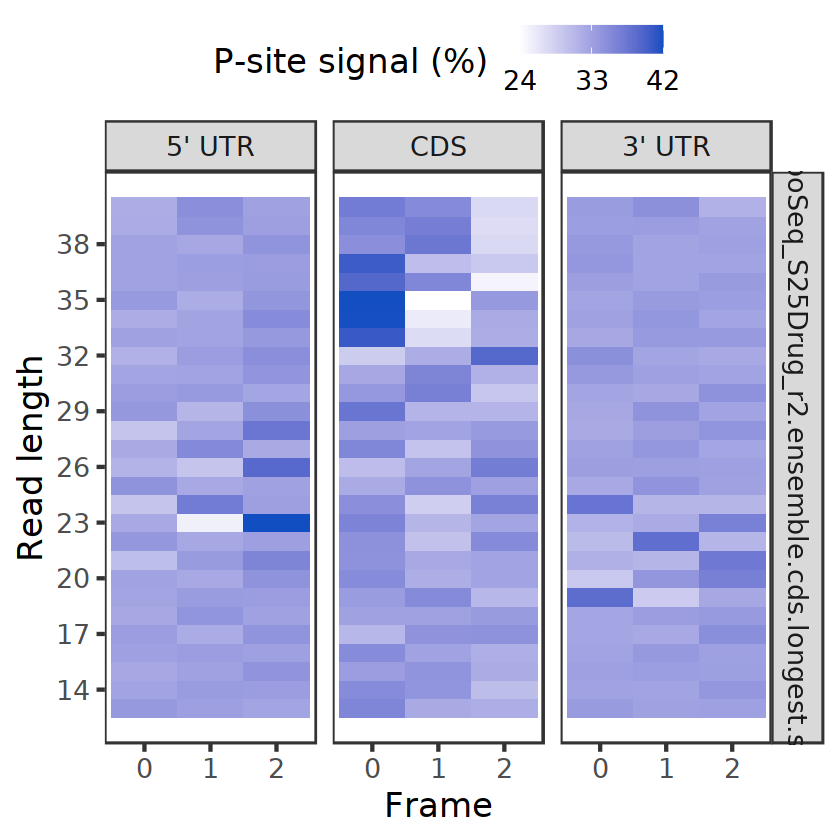

In [15]:
Ribolog::print_period_region_length(reads_psite_list)

In [16]:
l_range <- c(30:38)
cDNA_longest_CDS <- '~/genomes/Ribolog/Human.GRC38.96_cDNA_longest_CDS.fa'

In [32]:
tr_codon_read_count <-  Ribolog::psite_to_codon_count(reads_psite_list, 
                                                     length_range = l_range, 
                                                     annotation,
                                                     fasta_file = cDNA_longest_CDS)

## Extracting Codon Counts

In [33]:
p2a <- function(x){
  y <- x[,c(1,2,4)]
  codon_type_A <- c(as.vector(y$codon_type)[-1],"XXX")
  y <- cbind(y, codon_type_A)
}

In [34]:
head(names(tr_codon_read_count))

[1] "1_RiboSeq_S25DMSO_r1.ensemble.cds.longest.srt.dd"
[2] "1_RiboSeq_S25DMSO_r2.ensemble.cds.longest.srt.dd"
[3] "1_RiboSeq_S25Drug_r1.ensemble.cds.longest.srt.dd"
[4] "1_RiboSeq_S25Drug_r2.ensemble.cds.longest.srt.dd"

In [37]:
tcrc.dmso       <- tr_codon_read_count[c(1,2)]
tcrc.decitabine <- tr_codon_read_count[c(3,4)]

In [38]:
bc.dmso <- Ribolog::CELP_detect_bias(tcrc.dmso, loess_method = "direct")

In [39]:
bc.dmso_pa_df <- lapply(bc.dmso, function(x) p2a(x))
bc.dmso_pa_df <- dplyr::bind_rows(bc.dmso_pa_df, .id = "transcript")
bc.dmso_pa_df$cond <- "DMSO"
head(bc.dmso_pa_df)

,transcript,codon_number,codon_type,bias_coefficient,codon_type_A,cond
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,ENST00000003084,1,ATG,1,CAG,DMSO
2,ENST00000003084,2,CAG,1,AGG,DMSO
3,ENST00000003084,3,AGG,1,TCG,DMSO
4,ENST00000003084,4,TCG,1,CCT,DMSO
5,ENST00000003084,5,CCT,1,CTG,DMSO
6,ENST00000003084,6,CTG,1,GAA,DMSO


In [40]:
bc.decitabine <- Ribolog::CELP_detect_bias(tcrc.decitabine, loess_method = "direct")

In [41]:
bc.decitabine_pa_df <- lapply(bc.decitabine, function(x) p2a(x))
bc.decitabine_pa_df <- dplyr::bind_rows(bc.decitabine_pa_df, .id = "transcript")
bc.decitabine_pa_df$cond <- "Decitabine"
head(bc.decitabine_pa_df)

,transcript,codon_number,codon_type,bias_coefficient,codon_type_A,cond
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,ENST00000003084,1,ATG,1,CAG,Decitabine
2,ENST00000003084,2,CAG,1,AGG,Decitabine
3,ENST00000003084,3,AGG,1,TCG,Decitabine
4,ENST00000003084,4,TCG,1,CCT,Decitabine
5,ENST00000003084,5,CCT,1,CTG,Decitabine
6,ENST00000003084,6,CTG,1,GAA,Decitabine


In [42]:
bc_pa_df <- rbind(bc.dmso_pa_df, bc.decitabine_pa_df)

In [43]:
saveRDS(bc_pa_df, 'bc_pa_df.rds')

## `glm`

In [49]:
estimates   <- data.frame(codon=as.Date(character()),
                          mean_dwell_time=character(),
                          p_val=character())

In [54]:
for (codon in unique(bc_pa_df$'codon_type_A')){
    print(codon)
    bc_pa_df_asite <- subset(bc_pa_df, codon_type_A == codon)
    bc_pa_df_asite$cond <- relevel(factor(bc_pa_df_asite$cond), ref="DMSO")
    fit1 <- glm(bias_coefficient ~ cond, data = bc_pa_df_asite)
    coeff <- fit1$coefficients[['condDecitabine']]
    pval <- coef(summary(fit1))[,4][['condDecitabine']]
    entry <- data.frame(codon, coeff, pval)
    names(entry) <- names(estimates)
    estimates <- rbind(estimates, entry)
}

[1] "CAG"
[1] "AGG"
[1] "TCG"
[1] "CCT"
[1] "CTG"
[1] "GAA"
[1] "AAG"
[1] "GCC"
[1] "AGC"
[1] "GTT"
[1] "GTC"
[1] "TCC"
[1] "AAA"
[1] "CTT"
[1] "TTT"
[1] "TTC"
[1] "TGG"
[1] "ACC"
[1] "AGA"
[1] "CCA"
[1] "ATT"
[1] "TTG"
[1] "GGA"
[1] "TAC"
[1] "CGC"
[1] "TCA"
[1] "GAC"
[1] "ATA"
[1] "CAA"
[1] "ATC"
[1] "TCT"
[1] "GAT"
[1] "GCT"
[1] "AAT"
[1] "CTA"
[1] "GAG"
[1] "CTC"
[1] "CGG"
[1] "CGA"
[1] "TGT"
[1] "ATG"
[1] "TAT"
[1] "TTA"
[1] "GGG"
[1] "GCA"
[1] "GTA"
[1] "CCG"
[1] "AAC"
[1] "GCG"
[1] "GGC"
[1] "TGC"
[1] "GTG"
[1] "ACA"
[1] "CAC"
[1] "CAT"
[1] "AGT"
[1] "ACT"
[1] "CGT"
[1] "GGT"
[1] "CCC"
[1] "ACG"
[1] "TAG"
[1] "XXX"
[1] "TAA"
[1] "TGA"


In [57]:
estimates$codon <- gsub('T', 'U', estimates$codon)

In [59]:
bs <- 30

colour_codon <- ifelse(estimates$codon == "AUG", "#104ec1",
                           ifelse(estimates$codon %in% c("UAA", "UGA", "UAG"),
                                  "darkred", "gray40"))
estimates <- estimates[order(-estimates$mean_dwell_time),]
estimates$codon <- factor(estimates$codon,levels = estimates$codon)
rownames(estimates) <- c(1:nrow(estimates))
head(estimates)


,codon,mean_dwell_time,p_val
,<fct>,<dbl>,<dbl>
1,GGG,-0.001364275,4.035758e-02
2,UUU,-0.001657928,1.570794e-02
3,UUG,-0.001730699,3.207811e-02
4,UUA,-0.001839726,6.611098e-02
5,GAG,-0.002018146,4.357805e-06
6,CAA,-0.002123307,4.605010e-03


In [60]:
area.color <- ! estimates$'codon' %in% c('XXX')

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


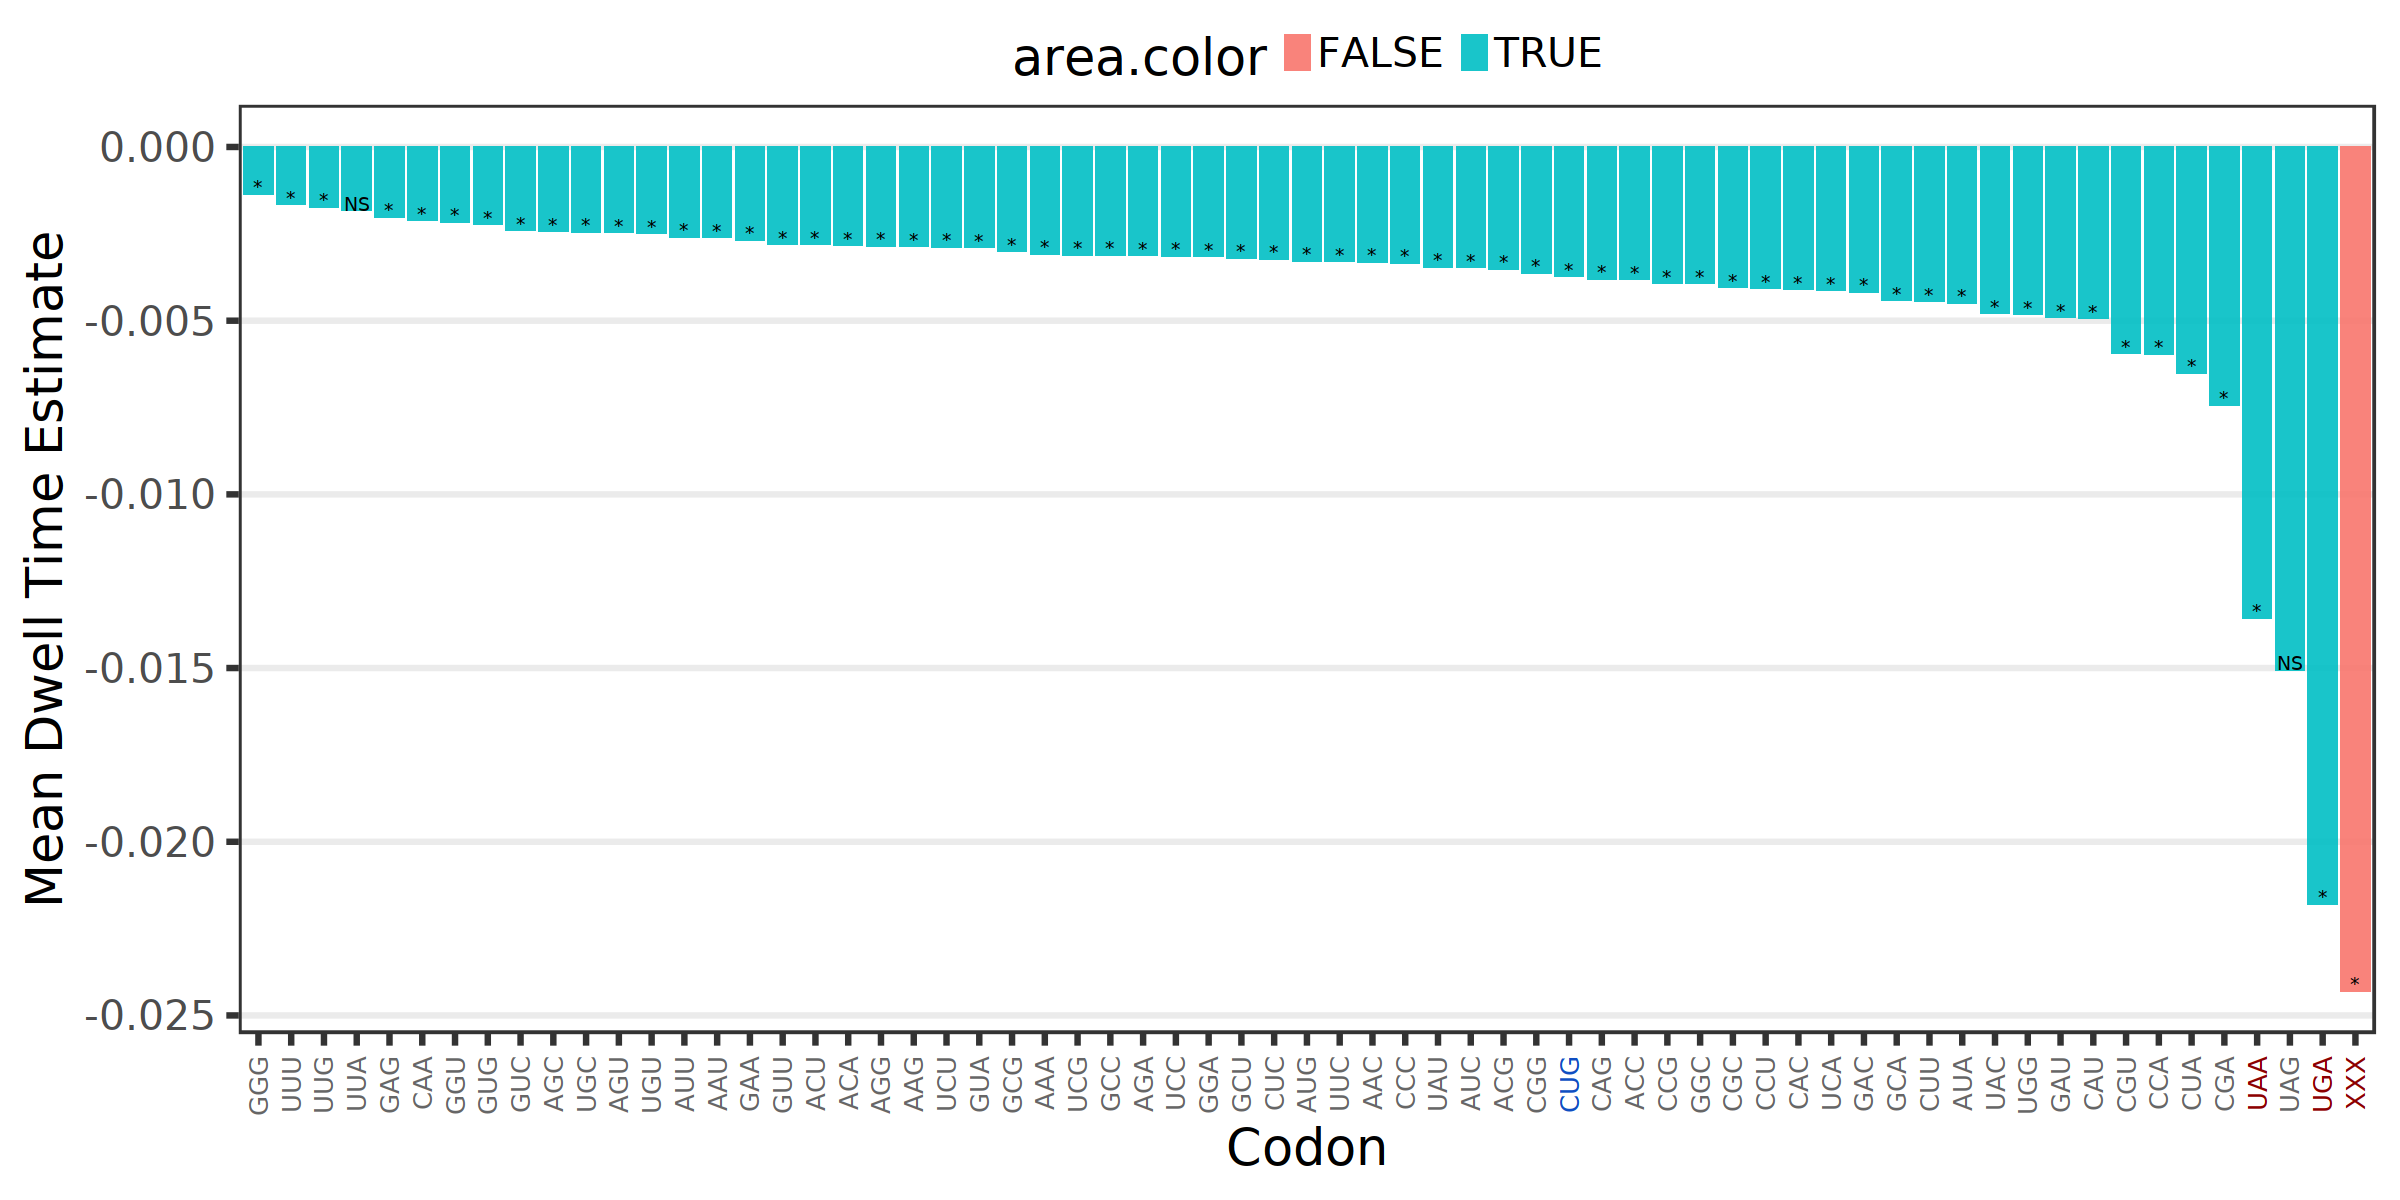

In [69]:
options(repr.plot.width = 20, repr.plot.height = 10)

ggplot(estimates, aes(x = codon, y = mean_dwell_time, fill=area.color, label = ifelse(p_val < 0.05, "*", "NS"))) +
      geom_bar(stat = "identity", alpha = 0.9)+ geom_text(vjust = 0) +
      scale_y_continuous("Mean Dwell Time Estimate") + 
      scale_x_discrete("Codon") +
      theme_bw(base_size = 30) +
      theme(
          legend.position = "top", legend.margin=margin(0,0,0,0), legend.box.margin=margin(5,0,-15,0),
          legend.text = element_text(margin = margin(l = -12, unit = "pt")),
          strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
          axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5, size = bs * 0.5, colour = colour_codon), 
          panel.grid.major.x = element_blank(),
          panel.grid.minor.y = element_blank()
      ) 

In [70]:
write.csv(estimates, 'asite_mean_dwell_times.csv')

# 

In [45]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/ribolog/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_0.5.1      stringr_1.4.0      dplyr_1.0.7        purrr_0.3.4       
 [5] readr_2.1.1        tidyr_1.1.4        tibble_3.1.5       tidyverse_1.3.1   
 [9] ggplot2_3.3.5      riboWaltz_1.2.0    Ribolog_0.0.0.9000

loaded via a namespace (and not attached):
 [1] bitops_1.0-7    

In [44]:
date()

[1] "Sat Dec 25 03:26:51 2021"